# Unsupervised and Supervised Learning

In [2]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [24]:
library(pheatmap)

In [3]:
options(repr.plot.width=6, repr.plot.height=6)

## Toy data set

In [4]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


**Note**: If you want graphics based on `ggplot2`, install the [`GGally`](https://cran.r-project.org/web/packages/GGally/index.html) package and use the `ggpairs` function. This has not been installed on the OIT Docker containers, so we use the simpler `pairs` function from base graphics.

```R
library(GGally)
ggpairs(iris, aes(colour = Species))
```

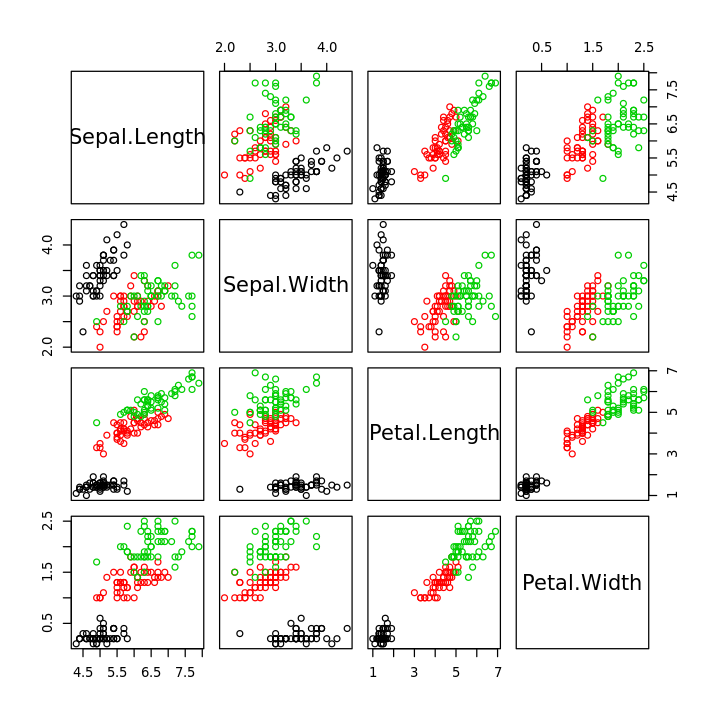

In [5]:
pairs(iris[,1:4], col=iris$Species)

## Unsupervised Learning

### Ordination (Dimension reduction)

#### PCA

In [6]:
pca <- as.data.frame(prcomp(iris[,1:4], center=TRUE, scale=TRUE, rank=2)$x)

In [7]:
dim(pca)

[1] 150   2

In [8]:
pca <- bind_cols(iris, pca)

In [9]:
head(pca)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PC1,PC2
5.1,3.5,1.4,0.2,setosa,-2.257141,-0.4784238
4.9,3.0,1.4,0.2,setosa,-2.074013,0.6718827
4.7,3.2,1.3,0.2,setosa,-2.356335,0.3407664
4.6,3.1,1.5,0.2,setosa,-2.291707,0.5953999
5.0,3.6,1.4,0.2,setosa,-2.381863,-0.6446757
5.4,3.9,1.7,0.4,setosa,-2.068701,-1.4842053


In [10]:
options(repr.plot.width=5.5, repr.plot.height=4)

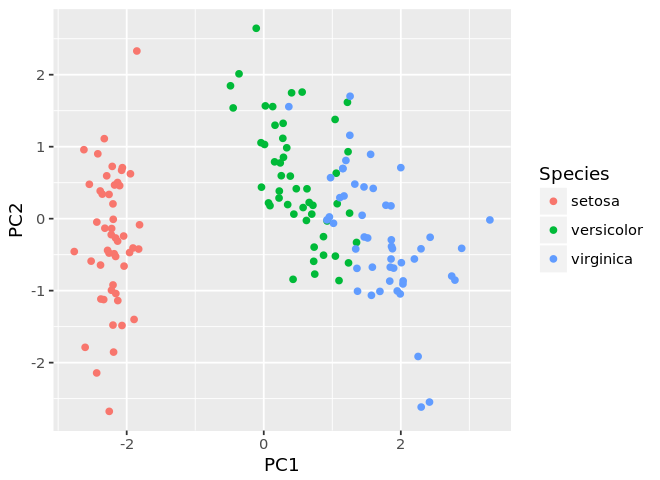

In [11]:
ggplot(pca, aes(x=PC1, y=PC2, color=Species)) +
geom_point()

#### MDS

In [12]:
dist(iris[1:5,1:4])

          1         2         3         4
2 0.5385165                              
3 0.5099020 0.3000000                    
4 0.6480741 0.3316625 0.2449490          
5 0.1414214 0.6082763 0.5099020 0.6480741

In [13]:
mds <- as.data.frame(cmdscale(dist(iris[,1:4]), k = 2))

In [14]:
dim(mds)

[1] 150   2

In [15]:
mds <- bind_cols(mds, iris)

In [16]:
head(mds)

V1,V2,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-2.684126,0.3193972,5.1,3.5,1.4,0.2,setosa
-2.714142,-0.1770012,4.9,3.0,1.4,0.2,setosa
-2.888991,-0.1449494,4.7,3.2,1.3,0.2,setosa
-2.745343,-0.3182990,4.6,3.1,1.5,0.2,setosa
-2.728717,0.3267545,5.0,3.6,1.4,0.2,setosa
-2.280860,0.7413304,5.4,3.9,1.7,0.4,setosa


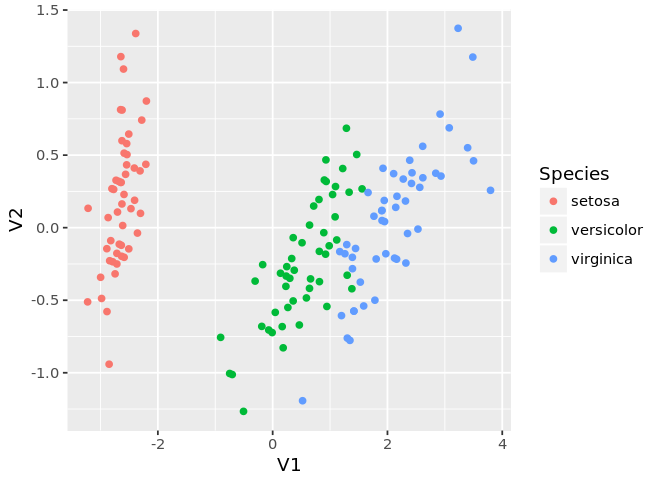

In [17]:
ggplot(mds, aes(x=V1, y=V2, color=Species)) +
geom_point()

### Clustering

**Note**: If you want graphics based on `ggplot2`, install the [`gdendro`](https://cran.r-project.org/web/packages/ggdendro/vignettes/ggdendro.html) package and use the `ggdendrogram` function. This has not been installed on the OIT Docker containers, so we use the simpler `plot` function from base graphics.

```R
hc <- hclust(dist(iris[,1:4]), 'complete')
ggdendrogram(hc, rotate = FALSE, size = 2)
```

#### Agglomertive clustering

In [18]:
options(repr.plot.width=16, repr.plot.height=4)

In [19]:
tree <- hclust(dist(iris[,1:4]), method='average')

In [20]:
tree$labels <- as.integer(iris$Species)

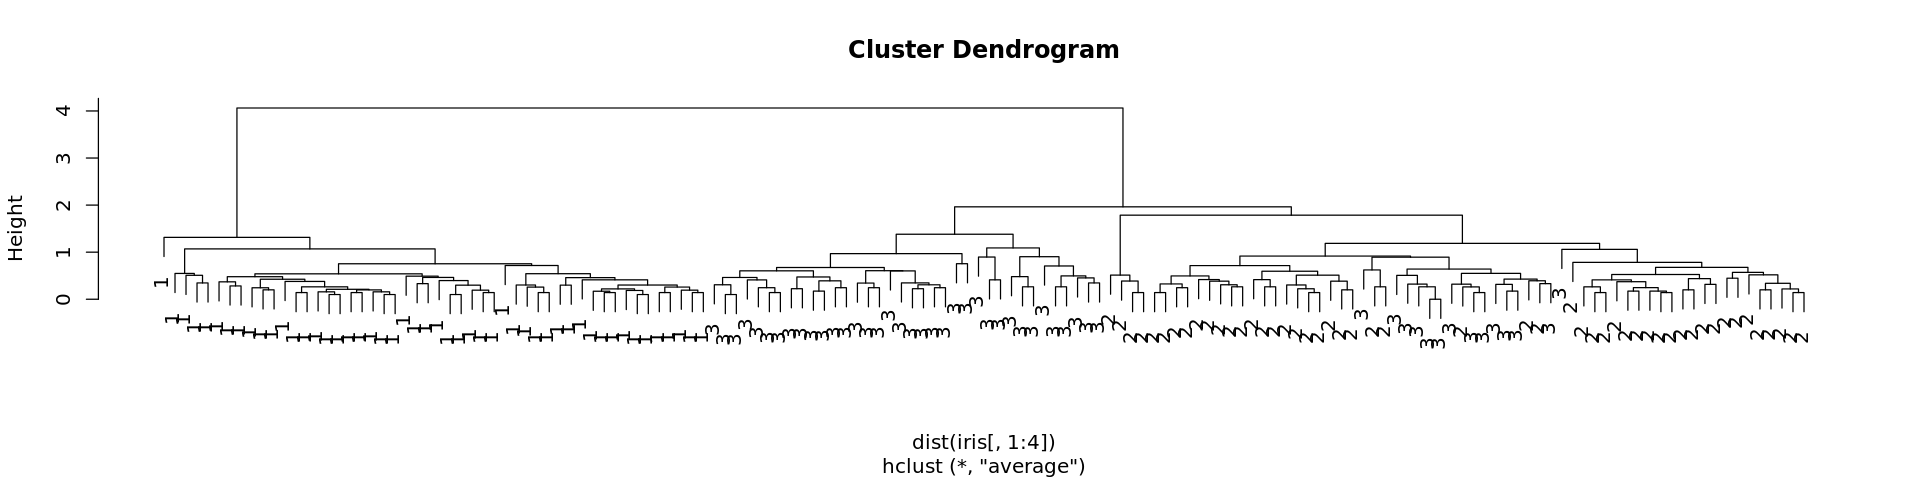

In [21]:
plot(tree)

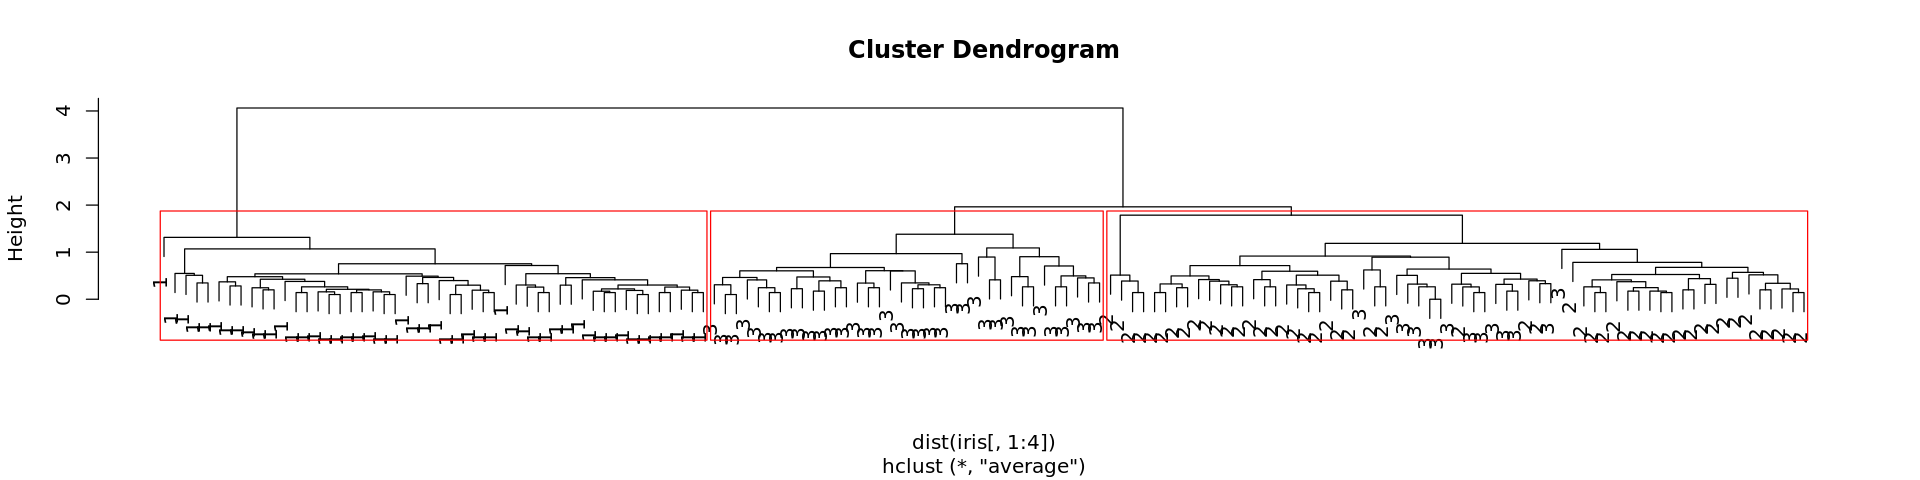

In [22]:
plot(tree)
rect.hclust(tree, k=3, border = "red")

#### Dendrograms are also constructed as part of visualizing a heatmapm

In [33]:
?pheatmap

In [29]:
options(repr.plot.width=5, repr.plot.height=6)

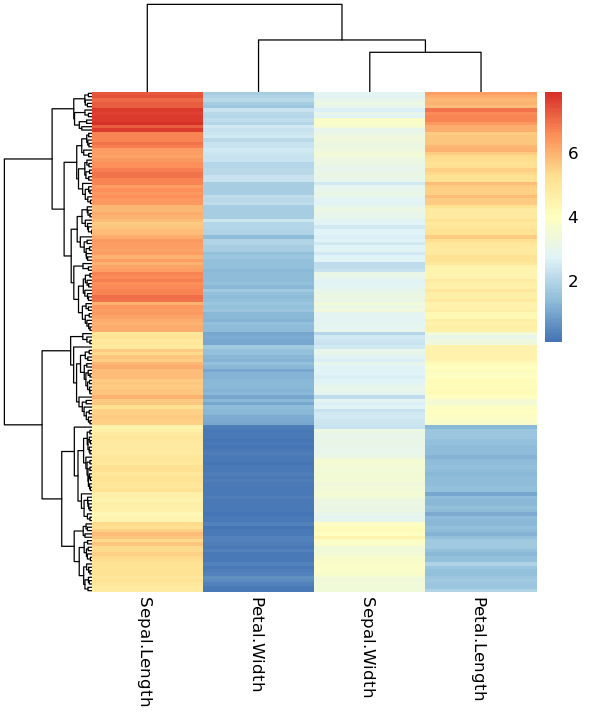

In [32]:
pheatmap(iris[,1:4], show_rownames = FALSE)

##### Visualize clusters on MDS plot

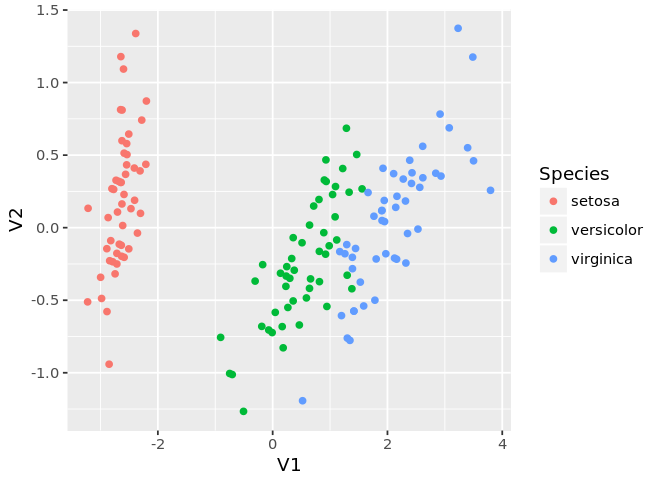

In [23]:
ggplot(mds, aes(x=V1, y=V2, color=Species)) +
geom_point() +
guides(color=guide_legend(title='Species'))

In [24]:
z <- cutree(tree, k = 3)

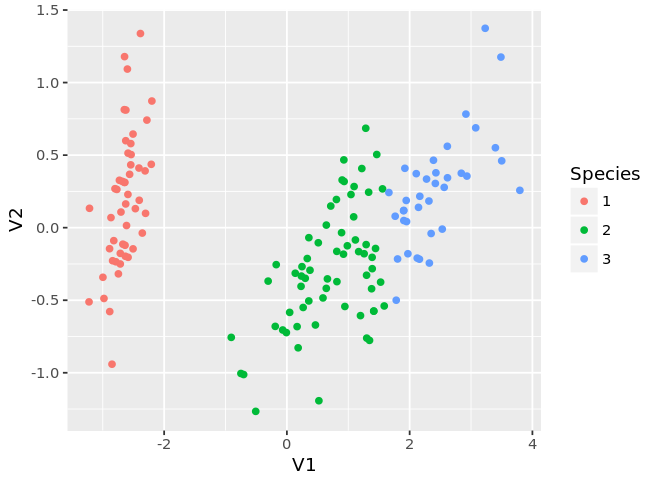

In [25]:
ggplot(mds, aes(x=V1, y=V2, color=as.factor(z))) +
geom_point() +
guides(color=guide_legend(title='Species'))

#### K-means clustering

In [26]:
km <- kmeans(iris[,1:4], centers=3)

In [27]:
km

K-means clustering with 3 clusters of sizes 62, 38, 50

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     6.850000    3.073684     5.742105    2.071053
3     5.006000    3.428000     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1

Within cluster sum of squares by cluster:
[1] 39.82097 23.87947 15.15100
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

##### Visualize clusters on MDS plot

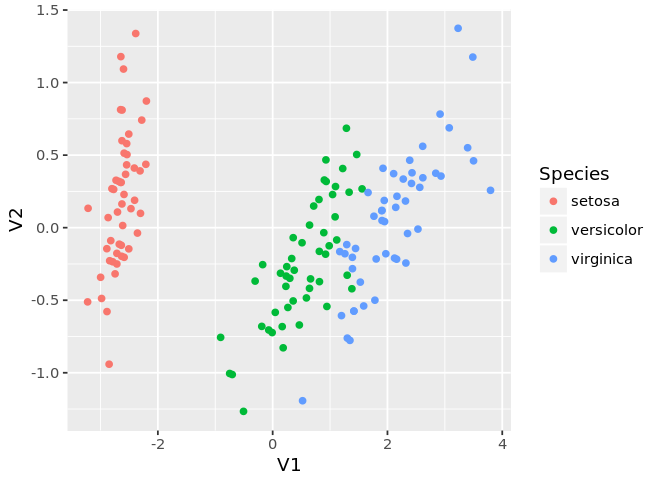

In [28]:
ggplot(mds, aes(x=V1, y=V2, color=Species)) +
geom_point() +
guides(color=guide_legend(title='Species'))

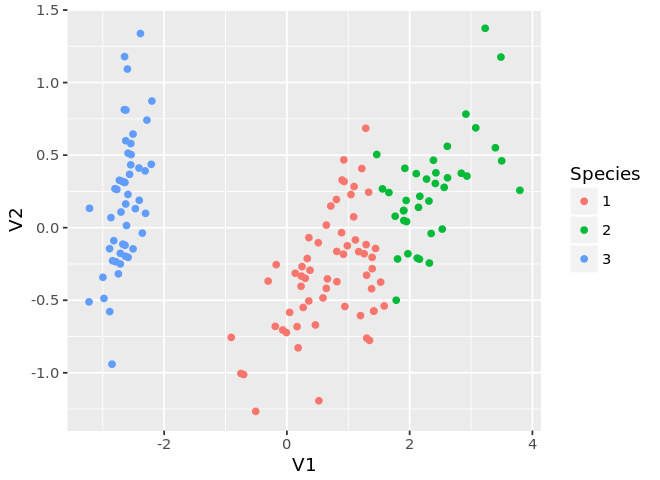

In [29]:
ggplot(mds, aes(x=V1, y=V2, color=as.factor(km$cluster))) +
geom_point() +
guides(color=guide_legend(title='Species'))

## Supervised Learning

#### Split into training and test sets

If you need to tune the model parameters, you will need to construct an additional validation data set.

In [30]:
idx <- sample(1:nrow(iris), 50)

In [31]:
idx

[1] 113  57  22 141  94 140  44 103  62  29  16  41  87   8  53 146  21  46   3
[20]  18 150  15  25  60 109  38  34 130  81 144  26  19  80  96  40 121  92 119
[39]  27  11  75 149 114  20 129  73 137  14  47  51

In [32]:
iris.test <- iris[idx,]
iris.train <- iris[-idx,]

#### Specify  and fit model

In [33]:
library(nnet)

In [34]:
fit <- multinom(Species ~ ., data=iris.train)

# weights:  18 (10 variable)
initial  value 109.861229 
iter  10 value 9.488101
iter  20 value 5.718048
iter  30 value 5.607010
iter  40 value 5.566651
iter  50 value 5.564816
iter  60 value 5.559930
final  value 5.559325 
converged


In [35]:
fit

Call:
multinom(formula = Species ~ ., data = iris.train)

Coefficients:
           (Intercept) Sepal.Length Sepal.Width Petal.Length Petal.Width
versicolor    15.30068    -4.714006   -8.950189     12.66693    2.132277
virginica    -19.12182    -6.891088  -15.500148     20.84077   18.004415

Residual Deviance: 11.11865 
AIC: 31.11865 

#### Make predctions

In [36]:
pred <- predict(fit, newdata = iris.test)

In [37]:
mds.test <- mds[idx,]

#### Visualize predictions

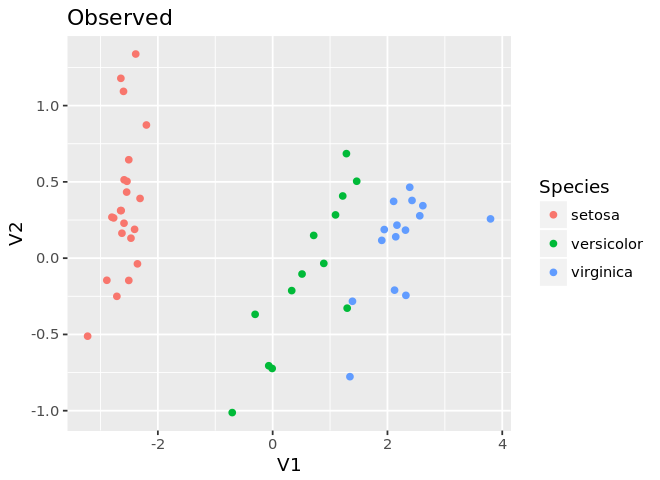

In [38]:
ggplot(mds.test, aes(x=V1, y=V2, color=as.factor(pred))) +
geom_point() +
guides(color=guide_legend(title='Species')) +
labs(title='Observed')

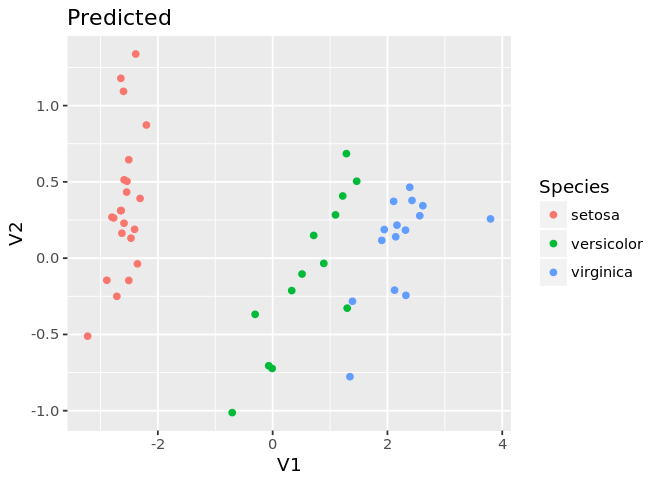

In [39]:
ggplot(mds.test, aes(x=V1, y=V2, color=as.factor(Species))) +
geom_point() +
guides(color=guide_legend(title='Species')) +
labs(title='Predicted')